# The numpy.random package 

## Programming for Data Analysis Assignment

### Andrew Walker - G00398788@gmit.ie

![numpy.org](https://numpy.org/doc/stable/_static/numpylogo.svg)

## 1. Introduction

This notebook contains an explanation of the ```numpy.random``` package in Python. 

NumPy is an open source project aiming to enable numerical computing with Python (https://numpy.org/about/). It is used for working with arrays and also has functions for working in the domain of linear algebra, fourier transform, and matrices (https://www.w3schools.com/python/numpy/numpy_intro.asp). In has applications in a wide range of fields such as astronomy, physics, engineering, and economics. 

The ```numpy.random``` package within NumPy is used to generate a sequence of numbers which approximate the properties of random numbers. The sequence of numbers that is generated is statistically random and can be used in a wide range of applications.    

The package generates the sequence with the use of a BitGenerator and a Generator. The BitGenerator uses a seed to derive the initial state and create a sequence of statistically random numbers bits. The Generator converts the sequence of random bits for a BitGenerator into sequences of numbers that follow a specific probability distribution (https://numpy.org/doc/stable/reference/random/index.html). 

This notebook will explain the following overarching features of the ```numpy.random``` package:

- Simple random data
- Permutations
- The purpose of five Distribution functions
    - Uniform
    - Bell
    - ....
    - ....
    - ....
- The use of seeds in generating pseudo-random numbers

The notebook will explain each feature and the functions contained in each. It will use ........ 

```matplotlib.pyplot``` will also be used.....

At the time of writing this notebook, the latest release of ```numpy.random``` is 1.21.0. This contents of this notebook are based on this release.

## 2. Initalising the ```numpy.random``` Package

Import Numpy:

In [1]:
import numpy as np

Construct a new Generator with the default BitGenerator (PCG64): 

In [2]:
rng = np.random.default_rng()

A seed can be specified in ```default_rng```. The use of a known seed means that the the algorithm is repeatable. BitGenerators and seeds are discussed further in Section XXXXXX

Pyplot will also be used to allow plotting of outputs generated:

In [3]:
import matplotlib.pyplot as plt

## 3. Simple Random Data

The ```numpy.random``` package contains four functions to generate simple random data. These are discussed in this section.

### 3.1 Integers


Numpy can be instructed to return random integers. For example:

In [4]:
rng.integers(0, 3, size=5)

array([2, 1, 0, 1, 0], dtype=int64)

In this example, the first parameter (```0```) sets the lowest integer that is possible to be generated. The upper limit is defined by the second parameter (```3```); the highest integer that is possible to be generated is one lower than this number. The parameter ```size=5``` designates that 5 random numbers should be generated.  

The shape of the output can be changed by specifying the number of rows and columns. For example, a 5 x 5 array containing random numbers between 0 and 9 can be generated using the following:

In [5]:
rng.integers(0, 10, size=(5,5))


array([[4, 1, 8, 8, 6],
       [4, 8, 6, 0, 5],
       [1, 6, 1, 7, 5],
       [9, 2, 6, 9, 8],
       [9, 5, 4, 7, 4]], dtype=int64)

In these examples, the output also includes the data type: ```dtype=int64```. By default, Python has the following data types:

- strings
- integer
- float
- boolean
- complex

NumPy also includes a number of additional data types (discussion of which is considered outside the scope of this notebook). 

```dtype=int64``` refers to the output containing 64-bit integers. This can be changed, as shown in the following example to output 8-bit integers:

In [6]:
rng.integers(0, 10, size=(5,5), dtype='int8')

array([[8, 6, 7, 8, 9],
       [0, 1, 2, 0, 0],
       [0, 5, 1, 2, 2],
       [8, 3, 8, 2, 8],
       [1, 5, 3, 8, 4]], dtype=int8)

The integers are generated by default as a discrete probability distribution. This means that the probability of outcomes is equally likely and with finite values (https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/). 

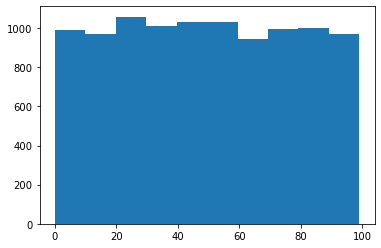

In [7]:
x = rng.integers(100, size=10000)
plt.hist(x)
plt.show()

### 2.2 Random

Numpy can be instructed to return random floats. For example:

In [8]:
rng.random()

0.6026686656709627

The size of output can be specified:

In [9]:
rng.random(size=(5,5))

array([[0.01290255, 0.12235312, 0.03254187, 0.32495145, 0.58984392],
       [0.63221993, 0.89537592, 0.74065705, 0.81266668, 0.68149551],
       [0.14134423, 0.16336789, 0.45941991, 0.94337604, 0.39813274],
       [0.59646743, 0.54366157, 0.88399816, 0.54583687, 0.95796916],
       [0.13216639, 0.81158722, 0.38624689, 0.65412041, 0.0533169 ]])

To specify the low and high values the formula ```(b + a) * rng.random() + a``` can be used. The following example outputs five floats between 0 (inclusive) and 3 (exclusive):

In [10]:
a = 0 #low value
b = 3 #high value
x = rng.random(size=(5,5)) 
y = (b + a) * x + a
y

array([[1.2934987 , 1.42047518, 1.0720459 , 0.53709963, 2.0429845 ],
       [2.45912141, 2.57247212, 0.58855838, 1.42789111, 0.02983105],
       [0.18400674, 2.06396916, 0.47651438, 1.36905544, 1.08496103],
       [1.88903983, 1.03208797, 1.75726777, 0.45862524, 0.8817941 ],
       [1.56642821, 1.00984431, 0.9437411 , 1.63824419, 1.45214328]])

Or for negative numbers between 0 (inclusive) and -1 (exclusive):

In [11]:
a = 0 
b = -1 
x = rng.random(size=(5,5)) 
y = (b + a) * x + a
y

array([[-0.76739656, -0.8486497 , -0.20777971, -0.11428544, -0.58134142],
       [-0.0214988 , -0.49680861, -0.7128861 , -0.00310107, -0.97893441],
       [-0.25331544, -0.00136214, -0.33757701, -0.33613077, -0.67523659],
       [-0.98345438, -0.51343585, -0.25342731, -0.32587909, -0.08221755],
       [-0.83109091, -0.50673831, -0.13859152, -0.60773938, -0.56103872]])

However, for negative numbers not including 0, the formula must be changed slightly. For example, for negative numbers between -1 (inclusive) and -2 (exclusive):

In [12]:
a = -1 
b = -2 
x = rng.random(size=(5,5))  
y = (b - a) * x + a
y

array([[-1.28078067, -1.50716098, -1.57406832, -1.00243577, -1.98567018],
       [-1.18181043, -1.26558785, -1.27672984, -1.17717181, -1.70450514],
       [-1.05723576, -1.18466498, -1.32274025, -1.87883267, -1.15883766],
       [-1.44502247, -1.68388832, -1.96939473, -1.05724557, -1.8683796 ],
       [-1.59624885, -1.57697034, -1.32718809, -1.49993011, -1.13338423]])

The floats are generated by default as a continuous probability distribution. This means that there are infinite number of equally likely measurable values. (https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/). 

<function matplotlib.pyplot.show(close=None, block=None)>

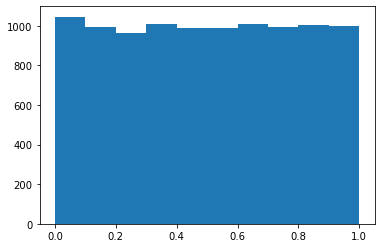

In [13]:
x = rng.random(size=10000)
plt.hist(x)
plt.show

### 2.3 Choice

### 2.4 Bytes

## 3. Permutations

The ```numpy.random``` package contains three methods for randomly permutating a sequence. These are discussed in this section. 

### 3.1 Shuffle

### 3.2 Permutation

### 3.3 Permuted

```numpy.random``` uses a seed to derive the initial state with a sequence of statistcally random numbers generated from this known starting point; the use of a known seed means that the the algorithm is repeatable. 

Therefore, the numbers generated are not completely random and are known as "pseudo-random numbers".